# Graphing and Fitting Data


In order to extract rate constant data from a reaction rate measurement, we need to graph it.  (We will also determine whether the anthocyanin + HOOH oxidation reaction is zero, 1st or 2nd order with respect to anthocyanin.)  Although you did these tasks in Excel during week 1 of the module, your group has collected a lot of data over the last two weeks, and we want to fully analyze all of it simultaneously.  Using Excel to do this one run at a time will quickly get repetitive and boring, but in Python you can automate the process -- and also the error analysis.  So, it's time to learn how to develop the code to do these tasks in Python!

## Organizing, Formatting, and Sharing Your Data
If we had a very small number of data points, it would be easy to just retype everything into list or array variables in Python.  However, you ALREADY typed all your data into Excel, as have your group members.  Who wants to go through that again?  Plus, typos.  Instead, we'll use your existing Excel files as the starting point.  But first, you'll need to organize your data so that it is understandable and ready to be combined with that of your lab partners.  

### Sharing "meta-data"
Your first task is deciding exactly how many runs you will include in your group's analysis.  Share this info with your lab partners, and develop (and record) a plan for numbering everyone's runs sequentially. (Example: Bob will upload runs numbered 1 through 6, Shawna will upload her runs numbered 7 through 15, and Alexia will upload her runs numbered 16 through 24.)  Be sure to include these new "group" run numbers in your ELN and original Excel file so that you can't get confused later about which run is which.  

You will also need to share information about each run with your group members, so in Excel or a group GoogleSheet build a <i>Run Information Table</i> organized like the one below.  Remember that you will probably have a different stray light measurement for different colors of light used (R, G, or B).  In addition, you will need to calculate the concentration of HOOH in each of your reaction mixtures.  Note that when the bottle says "3% HOOH," this means 3 g HOOH per 100 mL solution, +/- 5% relative error.  You'll need to convert this into molarity yourself, followed by a dilution calculation, to get these reaction mixture HOOH concentrations.  Fill out a row for each run that you are sharing with your group, and have your lab partners add rows for each of their runs.  Make sure that the Group Run #s are in sequential order on this table -- this will reduce confusion later when you are writing code!

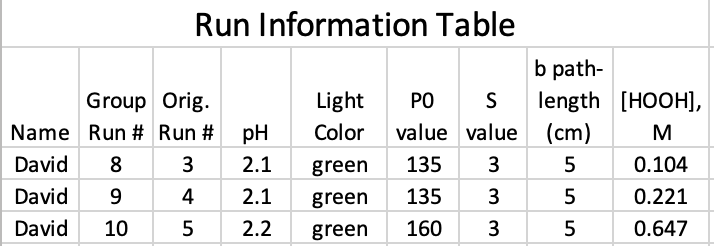

### Sharing raw data
Once your group numbering plan is in place and the Run Information Table is finished, download the "KineticsRawDataAligned.csv" file in LabArchives and have a look to see how we will structure our data for automated processing.  In the file, the beginning of which is shown below, time data <i>t</i> is in the first column (in seconds), the uncorrected raw light intensity pixel readings <i>P'</i> are in the 2nd column, and run number is repeated in every line of a given run in the third column.  (Run 1 data ends when the 1's end.)  Notice that all the data is placed end-to-end so that there are only these three columns.  There are no column headers.  
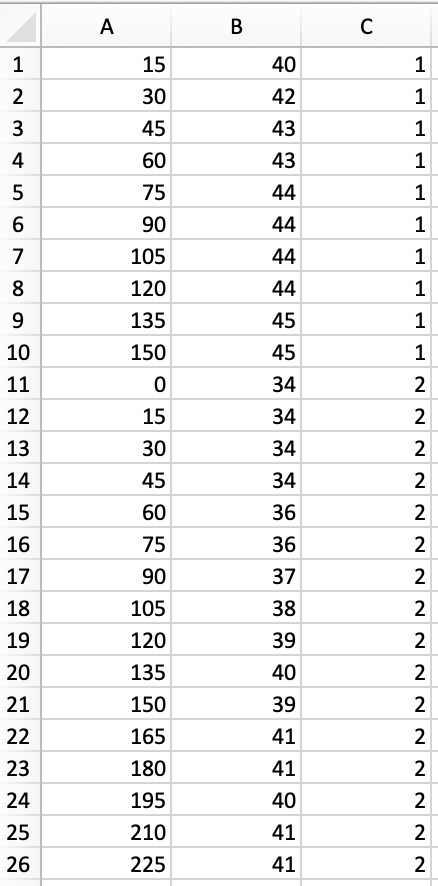

You will be pasting all of the good (or at least decent) data that you personally collected at all pH's into one .csv file with this format, and then your group will be combining everyone's individual datafiles together into one giant group input file.  Your individual file should contain a total of 5 - 10 runs -- 1 or 2 at each pH.  Paste in your raw data in place of the sample data in the .csv file, updating the run number column as you do so.  Save your updated, 3-column raw data file in "comma separated values .csv" format after adding your name to the title.  (Mac users:  remember NOT to use the UTF-8 csv format!)  Then, share it with your group using email or the Zoom chat window.  

## Combining All Group Data into One Input File
Once each member of your group has shared their correctly-formatted raw data, you may select one group member to combine the files into one large .csv file.  The runs must be pasted in sequential order with no gaps in the numbering (run 4 should not be followed by run 6) and no empty rows in between runs.  Once this combining of files is complete, save the combined group file as "KineticsRawData.csv" and re-share it, so that each member of the group has a copy.  As usual, each of you can then move it to your Chem 220 folder.  You are finally ready to import and get coding!  

In [2]:
import numpy as np

# Read your datafile into one large, 2-D array variable called "data"

data = np.genfromtxt('KineticsRawData.csv', dtype=float, delimiter=',', names=None) 

# Add something here to print out your data to make sure it was read correctly:

# Use the "type" function to identify what type of variable "data" is.



[[  15.   40.    0.   34.    0.   40.]
 [  30.   42.   15.   34.   15.   43.]
 [  45.   43.   30.   34.   30.   45.]
 [  60.   43.   45.   34.   45.   47.]
 [  75.   44.   60.   36.   60.   51.]
 [  90.   44.   75.   36.   75.   52.]
 [ 105.   44.   90.   37.   90.   53.]
 [ 120.   44.  105.   38.  105.   57.]
 [ 135.   45.  120.   39.  120.   58.]
 [ 150.   45.  135.   40.  135.   60.]
 [  nan   nan  150.   39.  150.   64.]
 [  nan   nan  165.   41.  165.   65.]
 [  nan   nan  180.   41.  180.   68.]
 [  nan   nan  195.   40.  195.   68.]
 [  nan   nan  210.   41.  210.   72.]
 [  nan   nan  225.   41.  225.   74.]
 [  nan   nan   nan   nan  240.   77.]
 [  nan   nan   nan   nan  255.   74.]
 [  nan   nan   nan   nan  270.   76.]
 [  nan   nan   nan   nan  285.   77.]
 [  nan   nan   nan   nan  300.   81.]
 [  nan   nan   nan   nan  360.   93.]
 [  nan   nan   nan   nan  420.  100.]
 [  nan   nan   nan   nan  450.  105.]
 [  nan   nan   nan   nan  480.  110.]
 [  nan   nan   nan   nan

numpy.ndarray

## Processing data:  stray light corrections and absorbance calculations
Now we'd like to use Python to carry out the same data analysis that we did in Excel, but in a more automated way, on all your group's data at once.  First, we'll correct our raw data values for stray light and calculate absorbance, working through the entire list of P values in a FOR loop!  While Python goes through the FOR loop, we'll also have it calculate concentration, ln(conc), and 1/conc values corresponding to each data point.  We will add the results of these calculations to new columns in the "data" array.  

To make this code work, you'll need to do the following

A. Add the stray light, P0, and pathlength values for each run to the list variables below, 

B. Expand the size of the "data" array by four extra columns, renaming it "datafull",

C. then complete the FOR loop code to calculate and store concentration, ln(conc), and 1/conc values for each data point collected by your group over the last two weeks.  

At the end of the code cell, print the "datafull" array to make sure your code is working.

In [ ]:
# A. Input information about each run, taken from your group's Run Information Table:
# 1. Enter measured values for stray light in each run, in order.  The sample code had three runs.  Your list will be
# quite a bit longer!
stray = [0,0,0]

# 2. Enter a list of measured values of P0 for each run, in order.
pzero = 

# 3. Enter a list of path length values for each run, in cm, in order:
b = 

# Enter the molar absorptivity coefficient for anthocyanin, red form, green wavelength of light, in M-1 cm-1:
# (We'll use this value for all runs, since it is the only one we have.)
epsilon = 


# B. Add columns to "data" to make room for calculated values:
# Here is sample code that appends 5 columns of zeros to an array "a" and stores the appended array with the name "b":
# b = np.append(a,np.zeros([len(a),5]),1)

# Declare empty array called "datafull" (for holding times, raw data, and processed data for all runs).
datafull=[]

# Add four columns of zeros to "data" to make room for absorbance, conc., ln(conc), and 1/conc data, and store in 
# array named "datafull".


# print statement to make sure zeros are there


# C. Do the calculations to replace the zeros with real results, one row at a time:
for i in range(len(datafull)):
    # Grab run number, convert to integer index for retrieving correct stray, pzero and b values from respective lists.
    # We subtract 1 from the run number in the 3rd column because the stray, pzero, and b list indexex start with zero.
    runnum = int(datafull[i,2]-1)
    # Correct for stray light and calculate absorbance.  Store in column 3 (the 4th column, since we start with zero).
    datafull[i,3] = np.log10((pzero[runnum]-stray[runnum])/(datafull[i,1]-stray[runnum]))
    # Use Beer-Lambert law to calculate anthocyanin concentration from absorbance value.  Store in column 4.
    datafull[i,4] = 
    # Calculate natural log of concentration.  Use np.log function.  Store in column 5.

    # Calculate 1/conc.  Store in column 6.

    
    
# D. Determine the number of runs in the dataset from the input file:
# The runnum index leaves the loop with a value indicating how many runs are in the complete dataset, counting from 
# zero.  We add one to get an integer variable "lastrun" equal to the number of runs in in the dataset, counting from 
# one.  We'll need this later!
lastrun=int(runnum+1)
print(lastrun)   


# E. Check your results:
# Print datafull and check the first row calculations to make sure your code is working.



## Processing data:  Zero, 1st, and 2nd order graphs
As you know, in order to find the reaction order (and the k' values for each run), we'll need to create graphs of concentration, ln(conc) and 1/conc vs. time.  Normally, you might pick one or two runs to focus on, but since we're coding in Python, why not do them all?  Then you can determine reaction order <i>from the entire dataset</i> your group has collected.  This will be a much more reliable determination of reaction order!

Here, we'll first build a series of 3 graphs (zero, 1st, and 2nd order) for each run in your group dataset.  That's a lot of graphs, but your main effort will be scrolling through them to have a quick look.  

So, you may be thinking, how do we graph just one run, when we have placed them all end-to-end in our data array?  This is where the third column containing run numbers comes in handy.  We will use FOR loop code that goes through the data run by run (NOT line by line), temporarily placing all the data with a given run number in an array called "run".  At that point, we build zero, 1st, and 2nd order graphs from the data in "run", then the FOR loop advances to the next run.  Check it out.  You just need to declare the empty array variable and add code for the 2nd order plot:

In [ ]:
import matplotlib.pyplot as plt

# The following code copies all rows [:] of the array called "example" that have "1" in the third column [2]
# and stores them in an array called "output":
# output = example[example[:,2]==1]   

# We can use this code syntax in a FOR loop that will go through each run, in order

# A.  Declare the empty array variable "run":



for i in range(1,lastrun+1):   # Loop through each run.  The first time through, i = 1.  Second time, i = 2, etc.
    # B. Extract data from run i in "datafull" and store in output array "run"
    run = datafull[datafull[:,2]==i]   
    # Here is code to build multiple graphs as output (3 at a time):
    fig, plot1 = plt.subplots()
    plot1.plot(run[:,0], run[:,4], 'ro')

    # Add axis labels including units, and a title.
    plot1.set_xlabel("some numbers (unity units)")
    plot1.set_ylabel("other numbers (unit mcunitface)")
    plot1.set_title('Spiffy Title')

    # Add code to do the 1st order plot 
    fig, plot2 = plt.subplots()
    plot2.plot(run[:,0], run[:,5], 'go')

    # Add axis labels including units, and a title.
    plot2.set_xlabel("some numbers (unity units)")
    plot2.set_ylabel("other numbers (unit mcunitface)")
    plot2.set_title('Title')

    # Add code to do the 2nd order plot, in blue

    
    # Add axis labels including units, and a title.

    
    



Now you should see some figures -- three, actually, for each run of data in your input file -- with zero order in red, 1st order in green, and 2nd order in blue,  along with some very unhelpful axis labels. 

1. In the code block, update the axis labels and titles to something that is actually properly descriptive for your data

2. In two of your plots, change the plot to use some other symbol.  This will help you tell them apart at a glance!

You should now have three plot types easily distinguished by symbol, color, titles, and axis labels.  If any of the graphs look nonsensical, check the input data to look for problems or typos. If you made graphs earlier in Excel, you can also compare to those to make sure they look similar. 

Hopefully, some of your graphs look fairly linear!  Take a quick scroll through all the graphs, noting whether zero, first, or second order graphs in general look more linear.  <b>Record this impression in your ELN.</b>


## Finding the equation of the line:

Now we'll have Python do linear regressions to figure out the slope and intercept of a straight line that best fits the data in each graph above.  Python will also calculate the R2 value and the uncertainty in the slope of each linear fit.  

In order to keep track of all of this output, we will be building a 3-dimensional output array variable called "regressions".  In this array, the first dimension will be the run number, the second dimension will be the graph reaction order (zero, first, or second order style), and the third dimension will be the regression output variables we are interested in.  Later we'll be able to access any result we want using indexes for each dimension, keeping in mind that indexes count from zero.  For example "regressions[3,2,3]" will give us Run 4, 2nd order (which is the third option), 4th regression output variable.  

### Syntax notes  
Arrays that are more than two-dimensional cannot be declared with empty brackets like we've used earlier.  Instead, we must declare up front how many elements the array will hold in each of its dimensions.  For example, "array = np.empty((5,5,5))" declares an empty, 3-D numpy array that is 5 x 5 x 5 in size.  

In [ ]:
import scipy.stats as stats

# Declare 3D output array.  First dimension will be run, second dimension will be order, and third dimension will be
# regression output variables (m, b, R, and sm, in order).  Note that the scipy.stats linregress function needs x and 
# y variables as input, and outputs five linear regression parameters automatically.  We only need four of them!
# Remember that the variable "lastrun" contains the number of runs in your input file, determined automatically.
regressions=np.empty((lastrun,3,4)) 

# Declare temporary empty data array "run" for holding info about individual runs and regressions, respectively.



# Step through each run, in order:
for i in range(0,lastrun):
    # Grab all the rows in "datafull" with "i+1" in the run number column, and place in "run"
    
    
    # Zero order:  Graph first column as x, 5th column as y.
    m, b, R, p, sm = stats.linregress(run[:,0], run[:,4])
    # Convert R to R-squared 
    R2 = 
    # Place linear regression parameters we want into temporary list
    oneregression=[m,b,R2,sm]    
    # Write the list into the correct location in our output 3-D array "regressions"
    regressions[i,0,:] = oneregression   
    
    # 1st order:  Graph first column as x, 6th column as y.
    m, b, R, p, sm = 
    R2 = 
    oneregression=[m,b,R2,sm]    
    regressions[i,1,:] = oneregression

    # 2nd order
    
    
    

print(regressions)



In the 2-D printout of regressions, you should see four columns (m, b, R2, and sm), groups of three rows (zero, first, and second order regression results), and then more groups of three rows.  Each group of 12 numbers represents one run in your group's data set.  

## Determining reaction order
Now that you've fit every run in every way, we can analyze the dataset as a whole to see whether zero, first, or second order graphing gives the most linear results, in general.  To do this, we'll slice out all the R2 values for each type of analysis, average them, and have Python compare the results and draw a conclusion.



In [ ]:
# Slice for all runs [:], zero order plots' [0] R2 values [2], and take their average:
averagezeroorderR2 = stats.tmean(regressions[:,0,2])
# Slice for all runs, first order plots' R2 values, and take their average:
averagefirstorderR2 = 
# Slice for all runs, second order plots' R2 values, and take their average:
averagesecondorderR2 = 

# Classy print statements of these averages
print("The average zero order R2 value for all runs is " + str(averagezeroorderR2))


# Put the three averages in a list called "results" for easy comparison
results = 

# This code identifies the largest of a list of numbers, and gives its index in the list.
# If the largest number is the first number in the list, it returns "0".  If the second, "1", etc.
# Because of how we've set up our results list, the index is the reaction order!
rxnorder = np.argmax(results)

# Print out the reaction order based on your group's full experimental dataset!
print("The reaction with HOOH has a reaction order of " + 

Does the resulting conclusion match your expectations, based on your impression of how the graphs looked?  Make a note in your ELN.

## Save your linear plots
Now that you know the reaction order with respect to anthocyanin, the other-order graphs (the non-linear ones) are no longer useful.  So, be sure to save the all the linear, correct-order plots based on data that you personally collected into your ELN.  You can take screenshots and paste the images into Lab Archives, or you can adapt the graphing code in the code cell below, adding the matplotlib.pyplot "fig.savefig" command, like we did before.  Change file names to avoid overwriting the same file repeatedly.  


In [ ]:
# Use this optional code cell to produce (and save) the linear graph for each of the kinetics runs 
# that you did personally.  Be sure to give them titles and filenames with run numbers so 
# that you won't get them mixed up.  


## Determine the psuedo rate constant  k' and its uncertainty
Remember that the linear plot not only tells you what the order of the reaction is with respect to the reactant that is controlling the rate -- it also has a slope from which we will easily derive the psuedo rate constant k'.  For second order reactions, slope = k'.  For zero and first order reactions, slope = -k'.  That's almost too easy!  So, our next task is extracting the correct slopes and their uncertainties from our output array.

In [ ]:
# Use this code cell to slice out the correct k values and uncertainties from the 
# "regressions" output array, using its triple index [run,order,regression variable].  
# Use the "rxnorder" variable to designate the reaction order -- this will keep your code flexible so you can use it
# to analyze reactions of a different order!


# Slice out [all runs, correct reaction order, m values] and convert to a list of k' values:
kprime = -regressions[:,rxnorder,0]
# Round off for printing:
kprimer = 
print

# Slice out [all runs, correct reaction order, uncertainties in the slopes (sm)] and place in list called "slopeerror":
slopeerror = 
# Round off for printing:
slopeerrorr = 
print


## Finding the relative uncertainty in k'
Now that you have absolute uncertainties and k' values in matching arrays, calculate a third array with relative uncertainty values for k'.  




In [ ]:
# Calculate relative uncertainties in each k' value
krelerror = 
print(krelerror)




## Error Propagation 1:  Finding the uncertainty in HOOH concentrations
Since k' = k[HOOH], we now need to use the HOOH concentrations for each of our reactions, and so we also would like to know the uncertainties in these concentrations.  Based on how you calculated HOOH concentrations in one of your reaction mixtures, let's make Python propagate uncertainties for this one mixture as an example.  To do this, you'll need to estimate the uncertainty in each volume measurement involved in the dilution

In [ ]:
# Use Python to calculate HOOH concentration uncertainty from the raw volume measurments and the uncertainty of 
# the concentration in the original bottle, which we'll assume to be a 5% relative error.  (For comparison, 
# nutritional label amounts on food only have to be accurate to within +/- 20%.)

# Volume of HOOH from the bottle used in reaction A (in mL)
HOOHvol1 = 
# Uncertainty in HOOH vol measurement with grad cyl, in mL.
HOOHvol_err = 
# Total volume of reaction mixture, in mL
MixVol1 = 
# Total uncertainty of volume of reaction mixture, in mL, propagated together from all 
# the individual volume readings
MixVol_err = 
# HOOH conc of bottle from store, from packaging, converted to M.
HOOH_bottleconc = 
# HOOH conc uncertainty in M in bottle from store, assumed to be +/-5% relative error
HOOH_bottle_err = 0.05*HOOH_bottleconc

# Now write code to calculate the relative error in the HOOH concentration in the rxn mixture.  
#HOOH_mixconc = HOOH_bottleconc*HOOHvol1/MixVol1

HOOH_mixrelerr = np.sqrt()

print('The relative error in the HOOH conc in the rxn mixture was ' + str(HOOH_mixrelerr) + '.')
  

<b>You may use this relative error for all of your HOOH reaction mixture concentrations.</b>  Notice that the error in the bottle concentration is the dominant uncertainty in HOOH reaction mixture concentration, so all reactions will have a similar relative error in [HOOH].

## Finding k and Error Propagation 2 (the uncertainty in k)

At last, we can have Python calculate the true rate constants (k) from our list variables "kprime" and "HOOH_mixconc", along with their uncertainties, which combine from [HOOH] and k' uncertainties.  

In [ ]:
# Define a numpy array of HOOH concentration in each reaction, in order.  This example is for analyzing 3 runs.
# Replace with data from your group's runs!
HOOH_mixconc = np.array([0.104, 0.221, 0.647])

# Calculate absolute uncertainties in HOOH concentrations, using general relative error result in previous code cell.
HOOH_uncert = 

# Calculate true rate constants 
k = 

# Propagate error to calculate the relative and absolute uncertainties in your list of k values
k_relerr = np.sqrt()
k_uncert = 

# Appropriately round off k, k_uncert, and HOOH_uncert for printing
kr = np.round()


print('The true rate constants k were measured to be ' + 
print('These measurements were conducted at a variety of pHs, so are not necessarily supposed to be the same.')


## Create an array of pH values for each run and graph k vs pH

In [ ]:
# Fill in a list of pH values, one for each run, in order.  This example list is for Dr. D's 3 runs.  
# Replace with your group's pH values for each run!
pH = [2.1,2.1,2.2]


# Graph k vs pH


# Add labels on the x and y axis, always including units.



# Save the figure for uploading to LabArchives



## Print out a summary table
Let's save time here by printing out a nice looking summary table we can screenshot and upload into the ELN.  Try out this sample code:  

In [ ]:
# Make a run number list for the table
runlist=[]
for i in range(0,lastrun):
    runlist.append(i)
    
# Print out column headings, with units    
print('  pH  [HOOH] +/-  kprime   +/-    k    +/-')
print('        M           s-1          M-1s-1')

# Print out your table
for i in range(0,lastrun):
    print(runlist[i],pH[i],HOOH_mixconc[i],HOOH_uncertr[i],kprimer[i],slopeerrorr[i],kr[i],k_uncertr[i])




Record these results for k', [HOOH], and k in a table in your ELN, paying attention to sig figs.  You can adjust the spacing of the column headings to match the data spacing.

Congrats -- you have built a fully operational Python program for importing, graphing, and fitting multiple sets of x-y data, along with some working error propagation code.  This should come in useful in future labs!

Copy this notebook, add your name to the title, and "download as --> notebook", then upload it to LabArchives.
